/Users/sriganeshlokesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
/Users/sriganeshlokesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



1. USA
2. AUS

Select Country:
 2

1. DFS
2. DFS + FC
3. DFS + FC + Singleton
4. DFS + Heuristic
5. DFS + Heuristic + FC
6. DFS + heuristic, FC + Singleton

Choose the Algorithm:
6
Color Assignment in Progress R -> NewSouthWales
[(-1, -2, 3, 'Victoria'), (-1, -2, 3, 'Queensland'), (-1, -4, 3, 'SouthAustralia')] ()()()()()
[(-1, -4, 3, 'SouthAustralia'), (-1, -2, 3, 'Queensland'), (-1, -2, 3, 'Victoria')] --Sort - ()()()()()
Color Assignment in Progress G -> SouthAustralia
[(-2, -1, 2, 'Queensland'), (-1, -1, 3, 'WestAustralia'), (-1, -2, 3, 'NorthTerritory'), (-2, -1, 2, 'Victoria')] ()()()()()
[(-2, -1, 2, 'Queensland'), (-2, -1, 2, 'Victoria'), (-1, -2, 3, 'NorthTerritory'), (-1, -1, 3, 'WestAustralia')] --Sort - ()()()()()
Color Assignment in Progress B -> Queensland
[(-2, -1, 2, 'NorthTerritory')] ()()()()()
[(-2, -1, 2, 'NorthTerritory')] --Sort - ()()()()()
Color Assignment in Progress R -> NorthTerritory
[(-2, 0, 2, 'WestAustralia')] ()()()()()
[(-2, 0, 2, 'WestAustralia')] --S

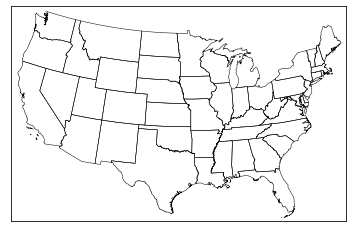

In [37]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import networkx as nx
import copy
import webbrowser
import timeit

paint_true = {}
backtrack = 0
if_singleton = 0
heuristic = 0

basemap = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
               lon_0=-95)

basemap.readshapefile(r'''/Users/sriganeshlokesh/anaconda3/lib/python3.7/site-packages/mpl_toolkits/basemap/st99_d00''', name='states', drawbounds=True)
states = []
for s_dict in basemap.states_info:
    states.append(s_dict['NAME'])
ax = plt.gca()


def check(map):
    for c, a in map.items():
        assert (c not in a)  
        for l in a:
            assert (l in map and c in map[l])  

def value_next(r, n, assignment):
    if heuristic == 0:
        return n[r]
    else:
        if if_singleton == 0:
            inf = [
                (
                    -len({paint_true[next] for next in n[number] if next in paint_true}),
                    
                    -len({next for next in n[number] if next not in paint_true}),
                    
                    number
                ) for number in n[r] if number not in paint_true]
        else:
            inf = [
                (
                    -len({paint_true[next] for next in n[number] if next in paint_true}),

                    -len({next for next in n[number] if next not in paint_true}),
                    
                    len(assignment[number]),
                    number
                ) for number in n[r] if number not in paint_true]

        print(inf, "()()()()()")
        inf.sort()
        print(inf, "--Sort - ()()()()()")
        if if_singleton == 0:
            candidates = [number for _, _, number in inf]
        else:
            candidates = [number for _, _, _, number in inf]
        return candidates


def color_assign(r, n, assignment):
    if heuristic == 0:
        return assignment[r]
    else:
        a = []
        for s_color in assignment[r]:
            c_total = 0
            a.append([s_color])
            for next in n[r]:
                if s_color in assignment[next]:
                    c_total = c_total + len(assignment[next]) - 1
                else:
                    c_total = c_total + len(assignment[next])
            a[a.index([s_color])].append(c_total)
        a = sorted(a, key=lambda a_sort: a_sort[1], reverse=True)
        a = [a_sort[0] for a_sort in a]
        return a


def dfs(r, n, assignment):
    add_color = 0
    w = 0
    global backtrack
    for s_color in color_assign(r, n, assignment):
        for j in n[r]:
            if j in paint_true and paint_true[j] == s_color:
                add_color = 1
                break
        if add_color == 1:
            add_color = 0
            continue
        paint_true[r] = s_color
        for k in value_next(r, n, assignment):
            if k not in paint_true:
                if (dfs(k, n, assignment) == False):
                    paint_true.pop(r)
                    w = 1
                    break
        if w == 0:
            print("Color Assigned %s -> %s" % (paint_true[r], r))
            return True
        else:
            w = 0
            continue
    backtrack = backtrack + 1
    return False


def decrease(r, n, a_c):
    for j in n[r]:
        if paint_true[r] in a_c[j]:
            a_c[j].remove(paint_true[r])


def decrease_for_forward_check(s_color, r, n, a_c):
    copy_a = copy.deepcopy(a_c)
    for j in n[r]:
        if s_color in copy_a[j]:
            copy_a[j].remove(s_color)
        if not d_validate(j, copy_a):
            return False
    return True


def d_validate(r, a_c):
    if not (a_c[r]):
        return False
    return True


def dfs_forward(r, n, assignment):
    w = 0
    d = copy.deepcopy(assignment)
    global backtrack
    for s_color in color_assign(r, n, assignment):
        
        a = copy.deepcopy(d)
        if decrease_for_forward_check(s_color, r, n, a) == False:
            continue
        paint_true[r] = s_color
        print("Color Assignment in Progress %s -> %s" % (s_color, r))
        decrease(r, n, a)
        a[r] = s_color
        if if_singleton == 1 and heuristic == 0:
            n[r] = sorted(n[r], key=lambda a_sort: len(assignment[a_sort]),
                                    reverse=False)
        for next in value_next(r, n, assignment):
            if next not in paint_true:
                if (dfs_forward(next, n, a)) == False:
                    paint_true.pop(r)
                    w = 1
                    break
        if w == 0:
            print("Color Assigned %s -> %s" % (paint_true[r], r))
            return True
        else:
            w = 0
            continue
    backtrack = backtrack + 1
    return False

WestAustralia = 'WestAustralia'
NorthTerritory = 'NorthTerritory'
SouthAustralia = 'SouthAustralia'
Queensland = 'Queensland'
NewSouthWales = 'NewSouthWales'
Victoria = 'Victoria'
Tasmania = 'Tasmania'

Aussie = {
   Tasmania: {Victoria},
    WestAustralia: {NorthTerritory, SouthAustralia},
    NorthTerritory: {WestAustralia, Queensland, SouthAustralia},
    SouthAustralia: {WestAustralia, NorthTerritory, Queensland, NewSouthWales, Victoria},
    Queensland: {NorthTerritory, SouthAustralia, NewSouthWales},
    NewSouthWales: {Queensland, SouthAustralia, Victoria},
    Victoria: {SouthAustralia, NewSouthWales, Tasmania}
}

aussie_color = {
    Tasmania: ['R', 'G', 'B'],
    WestAustralia: ['R', 'G', 'B'],
    NorthTerritory: ['R', 'G', 'B'],
    SouthAustralia: ['R', 'G', 'B'],
    Queensland: ['R', 'G', 'B'],
    NewSouthWales: ['R', 'G', 'B'],
    Victoria: ['R', 'G', 'B']
}

Alabama = "Alabama"
Alaska = "Alaska"
Arizona = "Arizona"
Arkansas = "Arkansas"
California = "California"
Colorado = "Colorado"
Connecticut = "Connecticut"
Delaware = "Delaware"
Florida = "Florida"
Georgia = "Georgia"
Hawaii = "Hawaii"
Idaho = "Idaho"
Illinois = "Illinois"
Indiana = "Indiana"
Iowa = "Iowa"
Kansas = "Kansas"
Kentucky = "Kentucky"
Louisiana = "Louisiana"
Maine = "Maine"
Maryland = "Maryland"
Massachusetts = "Massachusetts"
Michigan = "Michigan"
Minnesota = "Minnesota"
Mississippi = "Mississippi"
Missouri = "Missouri"
Montana = "Montana"
Nebraska = "Nebraska"
Nevada = "Nevada"
NewHampshire = "NewHampshire"
NewJersey = "NewJersey"
NewMexico = "NewMexico"
NewYork = "NewYork"
NorthCarolina = "NorthCarolina"
NorthDakota = "NorthDakota"
Ohio = "Ohio"
Oklahoma = "Oklahoma"
Oregon = "Oregon"
Pennsylvania = "Pennsylvania"
RhodeIsland = "RhodeIsland"
SouthCarolina = "SouthCarolina"
SouthDakota = "SouthDakota"
Tennessee = "Tennessee"
Texas = "Texas"
Utah = "Utah"
Virginia = "Virginia"
Vermont = "Vermont"
Washington = "Washington"
WestVirginia = "WestVirginia"
Wisconsin = "Wisconsin"
Wyoming = "Wyoming"

USA_S = {
    Alabama: {Georgia, Florida, Tennessee, Mississippi},
    Alaska: {Washington},
    Arizona: {California, Nevada, Utah, Colorado, NewMexico},
    Arkansas: {Missouri, Oklahoma, Texas, Louisiana, Tennessee, Mississippi},
    California: {Oregon, Nevada, Arizona, Hawaii},
    Colorado: {Wyoming, Nebraska, Kansas, Oklahoma, NewMexico, Arizona, Utah},
    Connecticut: {NewYork, RhodeIsland, Massachusetts},
    Delaware: {Maryland, Pennsylvania, NewJersey},
    Florida: {Alabama, Georgia},
    Georgia: {SouthCarolina, NorthCarolina, Tennessee, Alabama, Florida},
    Hawaii: {California},
    Idaho: {Washington, Montana, Oregon, Wyoming, Utah, Nevada},
    Illinois: {Wisconsin, Iowa, Missouri, Kentucky, Indiana, Michigan},
    Indiana: {Michigan, Illinois, Kentucky, Ohio},
    Iowa: {Minnesota, SouthDakota, Nebraska, Missouri, Wisconsin, Illinois},
    Kansas: {Nebraska, Colorado, Oklahoma, Missouri},
    Kentucky: {Indiana, Illinois, Missouri, Tennessee, Ohio, WestVirginia, Virginia},
    Louisiana: {Arkansas, Texas, Mississippi},
    Maine: {NewHampshire},
    Maryland: {Pennsylvania, WestVirginia, Virginia, Delaware},
    Massachusetts: {NewYork, Vermont, NewHampshire, Connecticut, RhodeIsland},
    Michigan: {Illinois, Wisconsin, Indiana, Ohio},
    Minnesota: {NorthDakota, SouthDakota, Iowa, Wisconsin},
    Mississippi: {Tennessee, Arkansas, Louisiana, Alabama},
    Missouri: {Iowa, Nebraska, Kansas, Oklahoma, Arkansas, Illinois, Kentucky, Tennessee},
    Montana: {Idaho, Wyoming, SouthDakota, NorthDakota},
    Nebraska: {SouthDakota, Colorado, Wyoming, Kansas, Missouri, Iowa},
    Nevada: {Oregon, Idaho, Utah, Arizona, California},
    NewHampshire: {Maine, Vermont, Massachusetts},
    NewJersey: {NewYork, Pennsylvania, Delaware},
    NewMexico: {Arizona, Utah, Colorado, Oklahoma, Texas},
    NewYork: {Pennsylvania, NewJersey, Connecticut, Massachusetts, Vermont},
    NorthCarolina: {Georgia, Tennessee, SouthCarolina, Virginia},
    NorthDakota: {Montana, SouthDakota, Minnesota},
    Ohio: {Michigan, Indiana, Kentucky, WestVirginia, Pennsylvania},
    Oklahoma: {Kansas, Colorado, NewMexico, Texas, Arkansas, Missouri},
    Oregon: {Washington, Idaho, Nevada, California},
    Pennsylvania: {Ohio, WestVirginia, Delaware, NewJersey, NewYork, Maryland},
    RhodeIsland: {Connecticut, Massachusetts},
    SouthCarolina: {Georgia, NorthCarolina},
    SouthDakota: {NorthDakota, Montana, Wyoming, Nebraska, Minnesota, Iowa},
    Tennessee: {Kentucky, Arkansas, Mississippi, Missouri, Alabama, Georgia, NorthCarolina, Virginia},
    Texas: {Oklahoma, NewMexico, Arkansas, Louisiana},
    Utah: {Idaho, Nevada, Wyoming, Colorado, Arizona, NewMexico},
    Vermont: {Massachusetts, NewYork, NewHampshire},
    Virginia: {WestVirginia, Kentucky, NorthCarolina, Tennessee, Maryland},
    Washington: {Oregon, Idaho, Alaska},
    WestVirginia: {Ohio, Virginia, Kentucky, Pennsylvania, Maryland},
    Wisconsin: {Minnesota, Illinois, Michigan, Iowa},
    Wyoming: {Montana, SouthDakota, Nebraska, Colorado, Utah, Idaho},
}

US_colors = {
    Alabama: ['R', 'G', 'B', 'Y'],
    Alaska: ['R', 'G', 'B', 'Y'],
    Arizona: ['R', 'G', 'B', 'Y'],
    Arkansas: ['R', 'G', 'B', 'Y'],
    California: ['R', 'G', 'B', 'Y'],
    Colorado: ['R', 'G', 'B', 'Y'],
    Connecticut: ['R', 'G', 'B', 'Y'],
    Delaware: ['R', 'G', 'B', 'Y'],
    Florida: ['R', 'G', 'B', 'Y'],
    Georgia: ['R', 'G', 'B', 'Y'],
    Hawaii: ['R', 'G', 'B', 'Y'],
    Idaho: ['R', 'G', 'B', 'Y'],
    Illinois: ['R', 'G', 'B', 'Y'],
    Indiana: ['R', 'G', 'B', 'Y'],
    Iowa: ['R', 'G', 'B', 'Y'],
    Kansas: ['R', 'G', 'B', 'Y'],
    Kentucky: ['R', 'G', 'B', 'Y'],
    Louisiana: ['R', 'G', 'B', 'Y'],
    Maine: ['R', 'G', 'B', 'Y'],
    Maryland: ['R', 'G', 'B', 'Y'],
    Massachusetts: ['R', 'G', 'B', 'Y'],
    Michigan: ['R', 'G', 'B', 'Y'],
    Minnesota: ['R', 'G', 'B', 'Y'],
    Mississippi: ['R', 'G', 'B', 'Y'],
    Missouri: ['R', 'G', 'B', 'Y'],
    Montana: ['R', 'G', 'B', 'Y'],
    Nebraska: ['R', 'G', 'B', 'Y'],
    Nevada: ['R', 'G', 'B', 'Y'],
    NewHampshire: ['R', 'G', 'B', 'Y'],
    NewJersey: ['R', 'G', 'B', 'Y'],
    NewMexico: ['R', 'G', 'B', 'Y'],
    NewYork: ['R', 'G', 'B', 'Y'],
    NorthCarolina: ['R', 'G', 'B', 'Y'],
    NorthDakota: ['R', 'G', 'B', 'Y'],
    Ohio: ['R', 'G', 'B', 'Y'],
    Oklahoma: ['R', 'G', 'B', 'Y'],
    Oregon: ['R', 'G', 'B', 'Y'],
    Pennsylvania: ['R', 'G', 'B', 'Y'],
    RhodeIsland: ['R', 'G', 'B', 'Y'],
    SouthCarolina: ['R', 'G', 'B', 'Y'],
    SouthDakota: ['R', 'G', 'B', 'Y'],
    Tennessee: ['R', 'G', 'B', 'Y'],
    Texas: ['R', 'G', 'B', 'Y'],
    Utah: ['R', 'G', 'B', 'Y'],
    Virginia: ['R', 'G', 'B', 'Y'],
    Vermont: ['R', 'G', 'B', 'Y'],
    Washington: ['R', 'G', 'B', 'Y'],
    WestVirginia: ['R', 'G', 'B', 'Y'],
    Wisconsin: ['R', 'G', 'B', 'Y'],
    Wyoming: ['R', 'G', 'B', 'Y'],
}


USA_S = {number: next for number, next in USA_S.items() if next}


def build_graph():
    g = nx.Graph()
    for e in tempList:
        g.add(e[0], e[1])
    return g


def paint_graph(G, paint_true):
    pos = nx.spring_layout(G)
    val = paint_true.values()
    nx.draw(G, pos, with_labels=True, node_size=500, node_color=val, edge_color='black', width=1,
            alpha=.7) 


if __name__ == '__main__':

    print("\n1. USA")
    print("2. AUS")
    n_name = int(input("\nSelect Country:\n "))

    country = ""
    complete = {}
    s_color = {}
    short = ""

    if n_name == 1:
        country = "USA"
        complete = USA_S
        s_color = US_colors
        short = NorthCarolina
        flag = 1
    elif n_name == 2:
        country = "AUS"
        complete = Aussie
        s_color = aussie_color
        short = NewSouthWales
        flag = 2
    else:
        print("Invalid!, Enter Valid Value")
        exit(0)

    check(USA_S)
    
    print("\n1. DFS")
    print("2. DFS + FC")
    print("3. DFS + FC + Singleton")
    print("4. DFS + Heuristic")
    print("5. DFS + Heuristic + FC")
    print("6. DFS + heuristic, FC + Singleton")
    
    algo = int(input("\nChoose the Algorithm:\n"))
    start = timeit.default_timer()
    if algo == 1:
        if (dfs(short, complete, s_color)):
            stt = list(paint_true.keys())
            clr = list(paint_true.values())
            if flag == 1:
                for i in range(len(paint_true.keys())):
                    seg = basemap.states[states.index(stt[i])]
                    p = Polygon(seg, facecolor=(clr[i]), edgecolor=clr[i])
                    ax.add_patch(p)
                plt.show()

    elif algo == 2:
        if (dfs_forward(short, complete, s_color)):
            stt = list(paint_true.keys())
            clr = list(paint_true.values())
            if flag == 1:
                for i in range(len(paint_true.keys())):
                    seg = basemap.states[states.index(stt[i])]
                    p = Polygon(seg, facecolor=(clr[i]), edgecolor=clr[i])
                    ax.add_patch(p)
                plt.show()
    elif algo == 3:
        if_singleton = 1
        if dfs_forward(short, complete, s_color):
            stt = list(paint_true.keys())
            clr = list(paint_true.values())
            if flag == 1:
                for i in range(len(paint_true.keys())):
                    seg = basemap.states[states.index(stt[i])]
                    p = Polygon(seg, facecolor=(clr[i]), edgecolor=clr[i])
                    ax.add_patch(p)
                plt.show()
    elif algo == 4:
        heuristic = 1
        if (dfs(short, complete, s_color)):
            stt = list(paint_true.keys())
            clr = list(paint_true.values())
            if flag == 1:
                for i in range(len(paint_true.keys())):
                    seg = basemap.states[states.index(stt[i])]
                    p = Polygon(seg, facecolor=(clr[i]), edgecolor=clr[i])
                    ax.add_patch(p)
                plt.show()
    elif algo == 5:
        heuristic = 1
        if (dfs_forward(short, complete, s_color)):
            stt = list(paint_true.keys())
            clr = list(paint_true.values())
            if flag == 1:
                for i in range(len(paint_true.keys())):
                    seg = basemap.states[states.index(stt[i])]
                    p = Polygon(seg, facecolor=(clr[i]), edgecolor=clr[i])
                    ax.add_patch(p)
                plt.show()
    elif algo == 6:
        heuristic = 1
        if_singleton = 1
        if (dfs_forward(short, complete, s_color)):
            stt = list(paint_true.keys())
            clr = list(paint_true.values())
            if flag == 1:
                for i in range(len(paint_true.keys())):
                    seg = basemap.states[states.index(stt[i])]
                    p = Polygon(seg, facecolor=(clr[i]), edgecolor=clr[i])
                    ax.add_patch(p)
                plt.show()
    else:
        print("Invalid Value, Enter Valid Value")
        exit(0)
    timer_stop = timeit.default_timer()
    print('\nTime: ', timer_stop - start)
    print("Number of Backtracks", backtrack)
    paint_true.clear()


# 